In [253]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.utils import resample


In [241]:
# Dataset path
dataset_path = "./dataset/dataset_train.csv"

# Target column
column_target = "is_click"

# Import CSV
dataset = pd.read_csv(dataset_path)

# Get shape of dataset
dataset_rows    = dataset.shape[0]
dataset_columns = dataset.shape[1]
print(f"dataset_rows = {dataset_rows}")

dataset_rows = 463291


In [242]:
# Unbalanced dataset
target_value_counts = dataset[column_target].value_counts()
is_click_no_len = target_value_counts[0]
is_click_yes_len = target_value_counts[1]
print(f"{column_target}")
print(f"0 : {is_click_no_len} - {is_click_no_len/dataset_rows*100}")
print(f"1 : {is_click_yes_len} - {is_click_yes_len/dataset_rows*100}")

is_click
0 : 431960 - 93.23729578170091
1 : 31331 - 6.762704218299081


In [243]:
# Undersample the majority class
resize_majority_class_len = int(0.6 * is_click_no_len)
dataset_majority = dataset[dataset[column_target] == 0]
dataset_minority = dataset[dataset[column_target] == 1]
dataset_majority_resample = resample(dataset_majority, replace=False, n_samples=resize_majority_class_len)

dataset_balanced = pd.concat([dataset_majority_resample, dataset_minority])
# Shuffle the balanced dataset
dataset_balanced = dataset_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


In [244]:
dataset_balanced[column_target].value_counts()

is_click
0    259176
1     31331
Name: count, dtype: int64

In [245]:
dataset_balanced.isna().any(axis=1).sum()

np.int64(245054)

In [246]:
ds = dataset_balanced.dropna()
ds.isna().any(axis=1).sum()

np.int64(0)

In [247]:


ds = ds.drop(["session_id", "user_id", "DateTime"], axis=1)

param = ["gender", "age_level", "user_depth", "city_development_index"]
# param = ["age_level"]

ds = ds[(param+["is_click"])]
ds = pd.get_dummies(ds, columns=param)

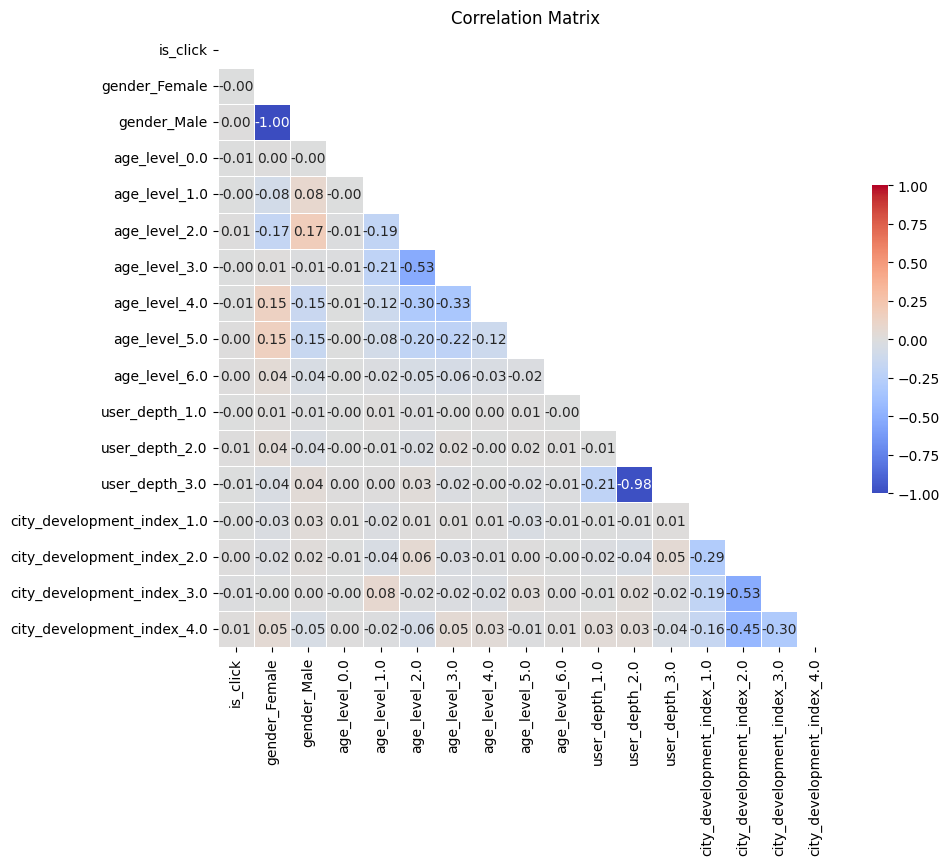

In [248]:
df = pd.DataFrame(ds)
corr_matrix = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix')
plt.show()

In [249]:
X = ds.drop(column_target, axis=1)
y = ds[column_target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [250]:
# Initialize logistic regression model
model_LogisticRegression = LogisticRegression()
model_LogisticRegression.fit(X_train, y_train)# Predict on test data
y_pred = model_LogisticRegression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

Accuracy: 0.8972610273897261
Confusion Matrix:
[[8157    0]
 [ 934    0]]


In [256]:
model_RandomForestClassifier = RandomForestClassifier(class_weight='balanced', random_state=42)
model_RandomForestClassifier.fit(X_train, y_train)# Predict on test data
y_pred = model_RandomForestClassifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

Accuracy: 0.6619733802661973
Confusion Matrix:
[[5764 2393]
 [ 680  254]]
F1 Score: 0.14185981569394024


F1 Score: 0.14185981569394024
